In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/world food production.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


        Entity  Year  Maize Production (tonnes)  Rice  Production ( tonnes)  \
0  Afghanistan  1961                   700000.0                    319000.0   
1  Afghanistan  1962                   700000.0                    319000.0   
2  Afghanistan  1963                   713000.0                    319000.0   
3  Afghanistan  1964                   720000.0                    380000.0   
4  Afghanistan  1965                   720000.0                    380000.0   

   Yams  Production (tonnes)  Wheat Production (tonnes)  \
0                  7467702.0                  2279000.0   
1                  7420515.0                  2279000.0   
2                  8479074.0                  1947000.0   
3                  9113779.0                  2230000.0   
4                 10067913.0                  2282000.0   

   Tomatoes Production (tonnes)  Tea  Production ( tonnes )  \
0                     1873812.0                     56315.0   
1                     2044797.0             

In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values (example: fill with 0)
df.fillna(0, inplace=True)

# Encode 'Entity' as it's a categorical column
df['Entity'] = df['Entity'].astype('category').cat.codes

# Check the preprocessed data
print(df.head())


Entity                                 0
Year                                   0
Maize Production (tonnes)              0
Rice  Production ( tonnes)             0
Yams  Production (tonnes)              0
Wheat Production (tonnes)              0
Tomatoes Production (tonnes)           0
Tea  Production ( tonnes )             0
Sweet potatoes  Production (tonnes)    0
Sunflower seed  Production (tonnes)    0
Sugar cane Production (tonnes)         0
Soybeans  Production (tonnes)          0
Rye  Production (tonnes)               0
Potatoes  Production (tonnes)          0
Oranges  Production (tonnes)           0
Peas, dry Production ( tonnes)         0
Palm oil  Production (tonnes)          0
Grapes  Production (tonnes)            0
Coffee, green Production ( tonnes)     0
Cocoa beans Production (tonnes)        0
Meat, chicken  Production (tonnes)     0
Bananas  Production ( tonnes)          0
Avocados Production (tonnes)           0
Apples Production (tonnes)             0
dtype: int64
   

In [4]:
# Define the features and target variable
features = df.columns.drop(['Year', 'Maize Production (tonnes)'])  # Exclude Year and target
target = 'Maize Production (tonnes)'

X = df[features]
y = df[target]

# Display the feature matrix and target vector
print(X.head())
print(y.head())


   Entity  Rice  Production ( tonnes)  Yams  Production (tonnes)  \
0       0                    319000.0                  7467702.0   
1       0                    319000.0                  7420515.0   
2       0                    319000.0                  8479074.0   
3       0                    380000.0                  9113779.0   
4       0                    380000.0                 10067913.0   

   Wheat Production (tonnes)  Tomatoes Production (tonnes)  \
0                  2279000.0                     1873812.0   
1                  2279000.0                     2044797.0   
2                  1947000.0                     2096077.0   
3                  2230000.0                     2388264.0   
4                  2282000.0                     2559608.0   

   Tea  Production ( tonnes )  Sweet potatoes  Production (tonnes)  \
0                     56315.0                            3270871.0   
1                     61519.0                            3562524.0   
2       

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(9529, 22) (2383, 22) (9529,) (2383,)


In [6]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 2938349.3293809486
Root Mean Squared Error: 11053913.629231028


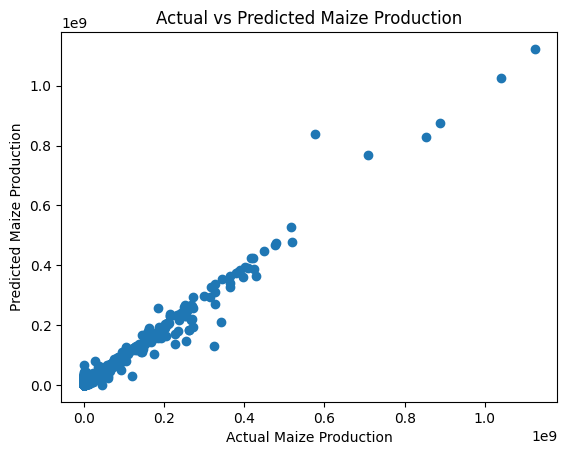

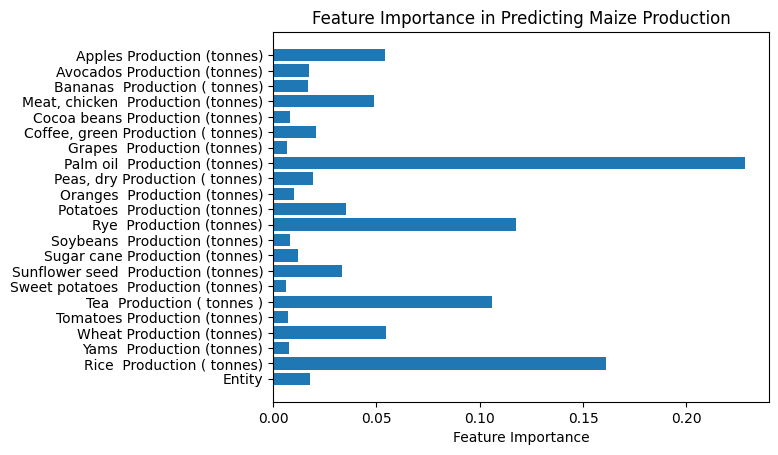

In [8]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Maize Production')
plt.ylabel('Predicted Maize Production')
plt.title('Actual vs Predicted Maize Production')
plt.show()

# Plot feature importance
importance = model.feature_importances_
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Maize Production')
plt.show()


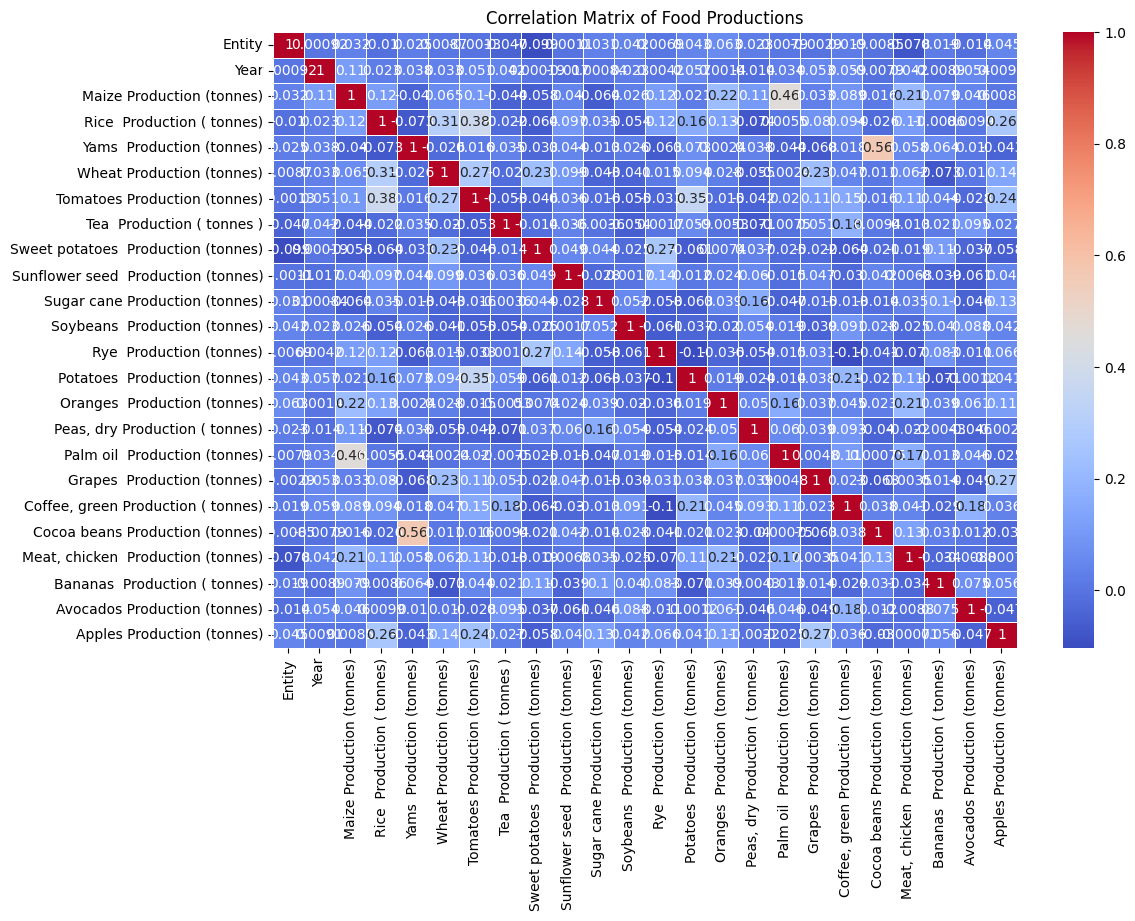

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Food Productions')
plt.show()


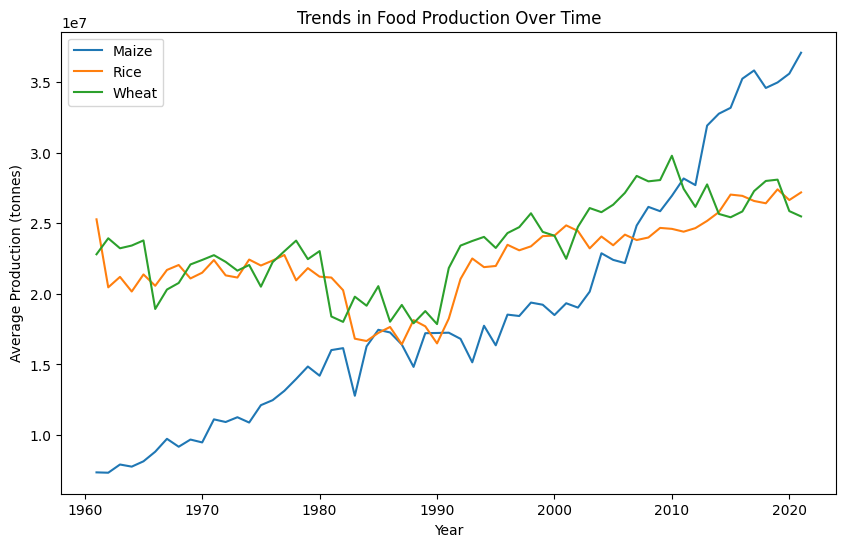

In [10]:
# Group by year and compute the mean production
df_grouped = df.groupby('Year').mean()

# Plot trends over time for key food items
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['Maize Production (tonnes)'], label='Maize')
plt.plot(df_grouped.index, df_grouped['Rice  Production ( tonnes)'], label='Rice')
plt.plot(df_grouped.index, df_grouped['Wheat Production (tonnes)'], label='Wheat')

plt.xlabel('Year')
plt.ylabel('Average Production (tonnes)')
plt.title('Trends in Food Production Over Time')
plt.legend()
plt.show()


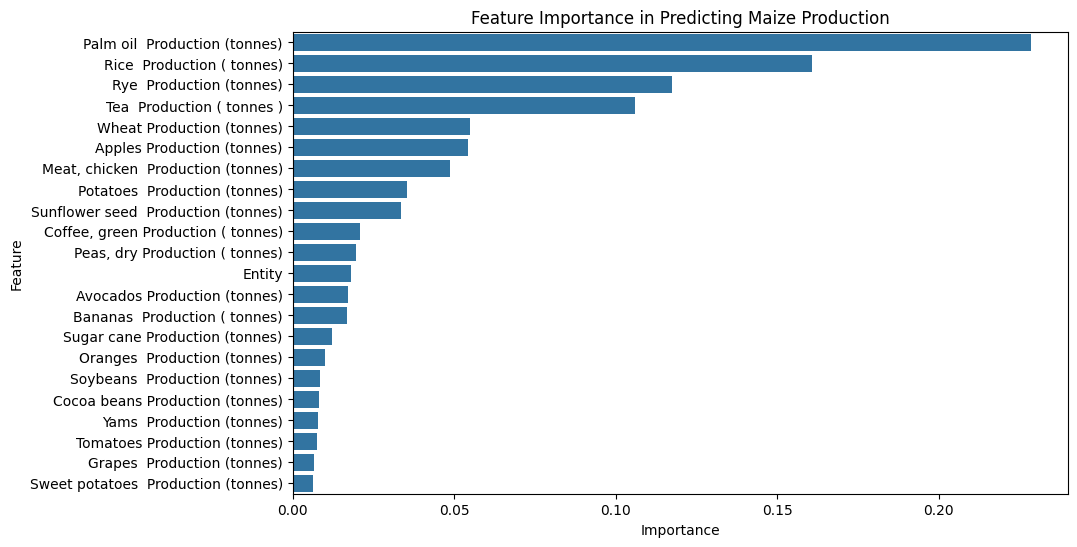

In [11]:
# Get feature importance from the model
importances = model.feature_importances_

# Create a DataFrame for feature importance
feat_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort by importance
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances)
plt.title('Feature Importance in Predicting Maize Production')
plt.show()


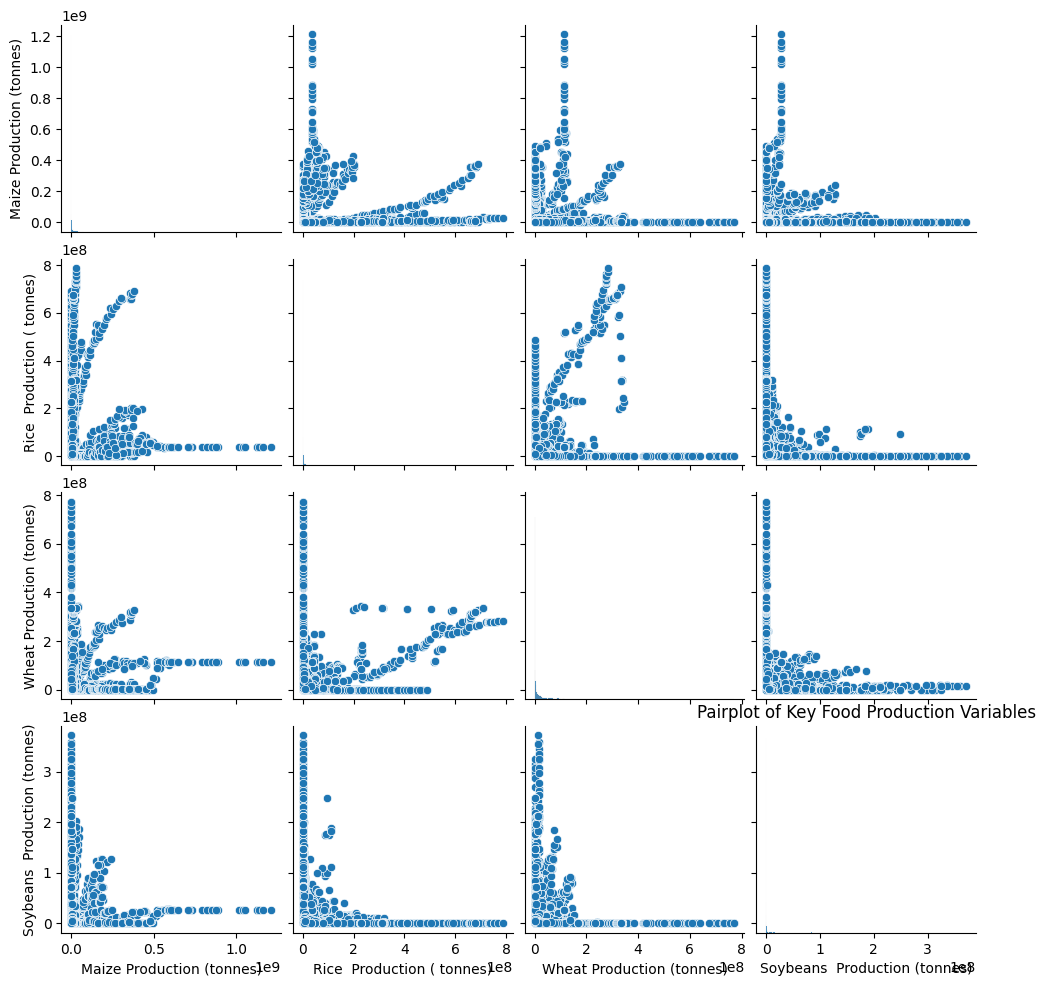

In [12]:
# Selecting key food production features for pairplot
key_features = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)', 'Wheat Production (tonnes)', 'Soybeans  Production (tonnes)']

# Create pair plot
sns.pairplot(df[key_features])
plt.title('Pairplot of Key Food Production Variables')
plt.show()


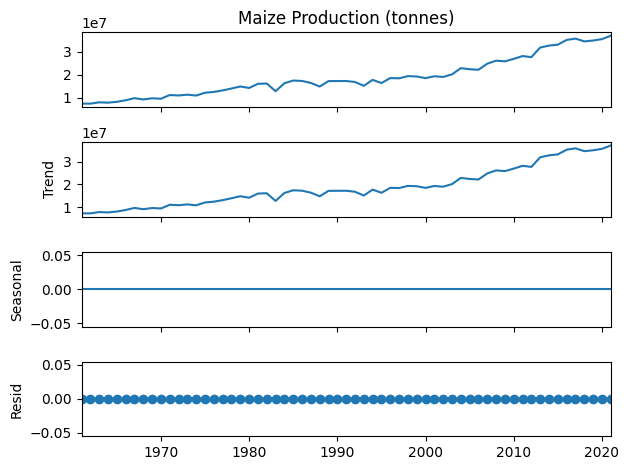

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition on maize production
result = seasonal_decompose(df_grouped['Maize Production (tonnes)'], model='additive', period=1)

# Plot the decomposition
result.plot()
plt.show()


In [14]:
import plotly.express as px

# Create an interactive line plot for maize production
fig = px.line(df_grouped.reset_index(), x='Year', y='Maize Production (tonnes)', title='Maize Production Over Time')
fig.show()

# Create an interactive scatter plot for actual vs predicted values
fig2 = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Maize Production', 'y': 'Predicted Maize Production'}, title='Actual vs Predicted Maize Production')
fig2.show()


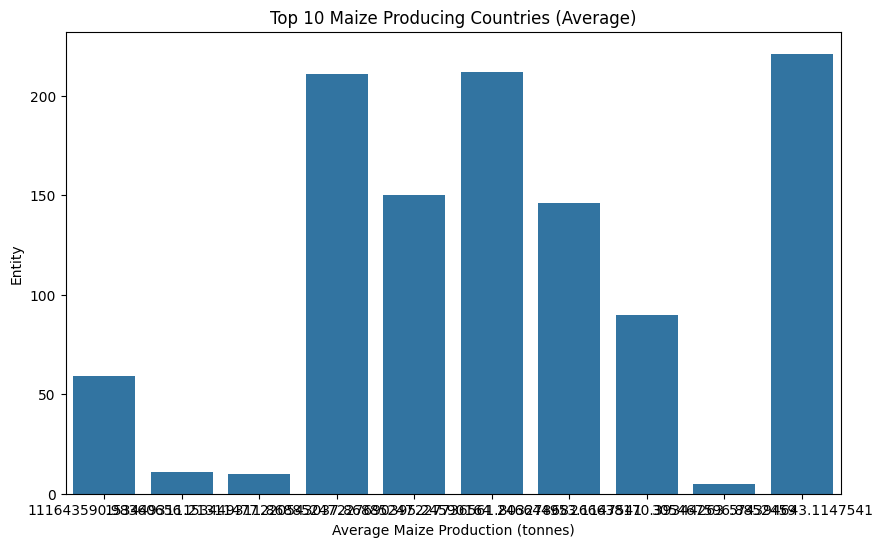

In [15]:
# Group by country (Entity) and get the average production
country_production = df.groupby('Entity').mean()

# Sort by maize production
top_countries = country_production.sort_values(by='Maize Production (tonnes)', ascending=False).head(10)

# Plot the top 10 maize producing countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries['Maize Production (tonnes)'], y=top_countries.index)
plt.title('Top 10 Maize Producing Countries (Average)')
plt.xlabel('Average Maize Production (tonnes)')
plt.show()


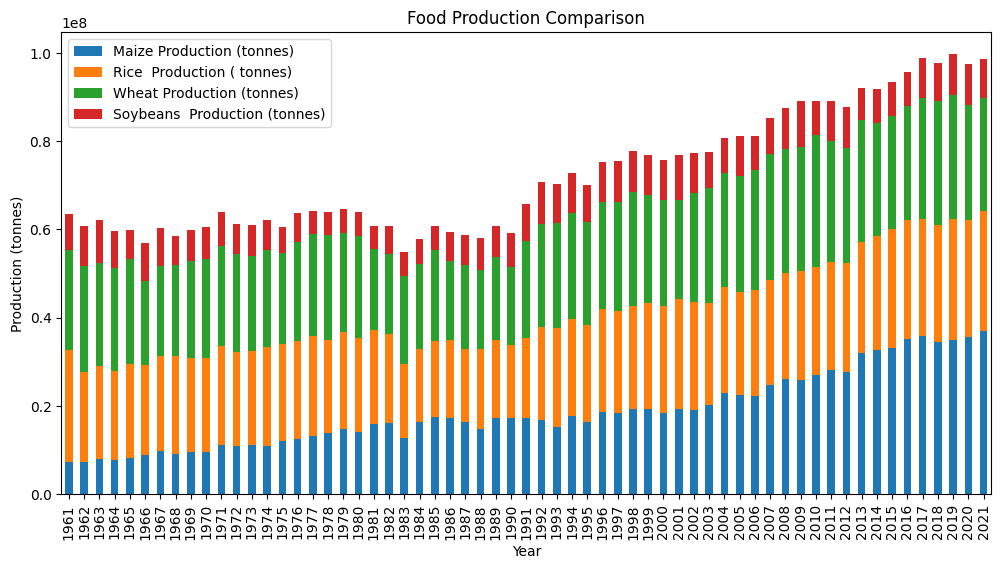

In [16]:
# Select some food categories for comparison
food_columns = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)', 'Wheat Production (tonnes)', 'Soybeans  Production (tonnes)']

# Plot a comparison
df_grouped[food_columns].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Food Production Comparison')
plt.ylabel('Production (tonnes)')
plt.show()


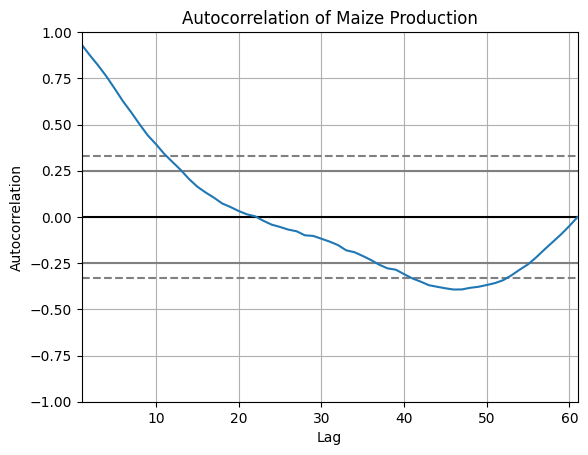

In [19]:
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation for maize production
autocorrelation_plot(df_grouped['Maize Production (tonnes)'])
plt.title('Autocorrelation of Maize Production')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



61    3.682171e+07
62    3.674242e+07
63    3.719659e+07
64    3.746124e+07
65    3.768645e+07
66    3.765138e+07
67    3.775643e+07
68    3.792192e+07
69    3.798352e+07
70    3.803362e+07
Name: predicted_mean, dtype: float64


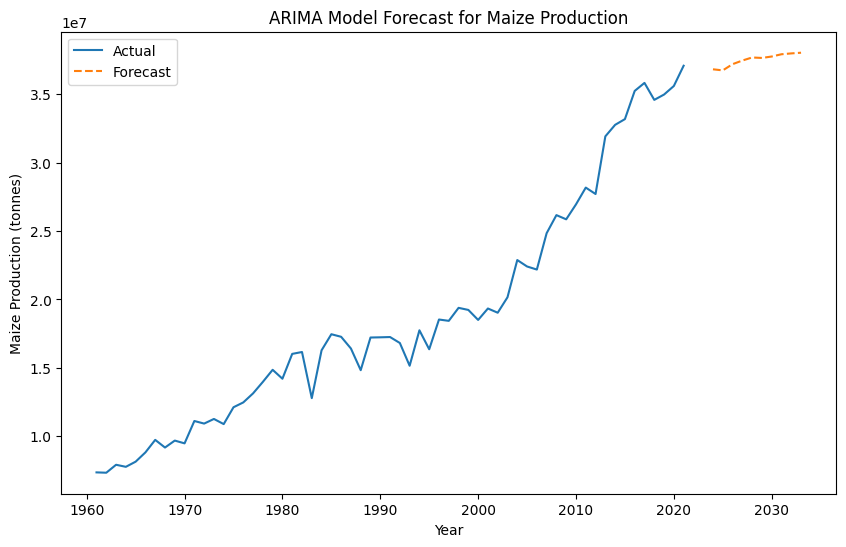

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model for maize production
arima_model = ARIMA(df_grouped['Maize Production (tonnes)'], order=(5, 1, 0))
arima_result = arima_model.fit()

# Make predictions
pred = arima_result.forecast(steps=10)  # Forecast the next 10 years
print(pred)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['Maize Production (tonnes)'], label='Actual')
plt.plot(range(2024, 2034), pred, label='Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Maize Production (tonnes)')
plt.title('ARIMA Model Forecast for Maize Production')
plt.legend()
plt.show()


In [22]:
# Strip whitespace from column names and replace spaces with underscores for easy access
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(r'\(.*\)', '', regex=True)

# Now, let's check the column names
print(df.columns)


Index(['Entity', 'Year', 'Maize_Production_', 'Rice__Production_',
       'Yams__Production_', 'Wheat_Production_', 'Tomatoes_Production_',
       'Tea__Production_', 'Sweet_potatoes__Production_',
       'Sunflower_seed__Production_', 'Sugar_cane_Production_',
       'Soybeans__Production_', 'Rye__Production_', 'Potatoes__Production_',
       'Oranges__Production_', 'Peas,_dry_Production_',
       'Palm_oil__Production_', 'Grapes__Production_',
       'Coffee,_green_Production_', 'Cocoa_beans_Production_',
       'Meat,_chicken__Production_', 'Bananas__Production_',
       'Avocados_Production_', 'Apples_Production_', 'Maize_YoY_Growth'],
      dtype='object')


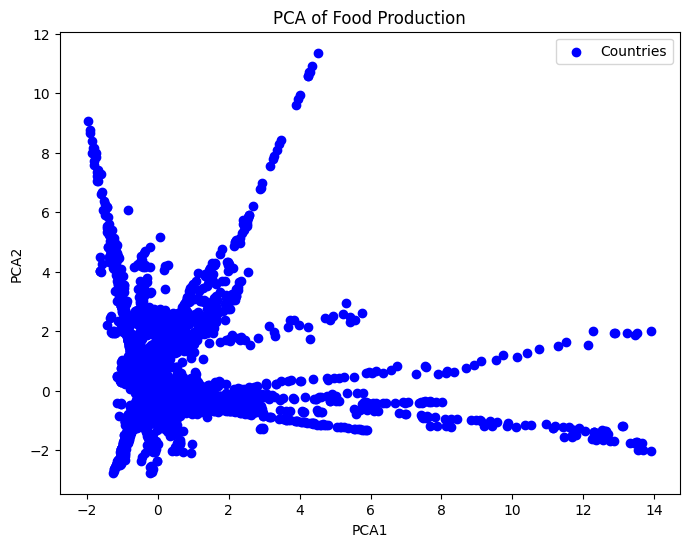

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select food production columns for PCA
food_columns = ['Maize_Production_', 'Rice__Production_', 'Yams__Production_',
                'Wheat_Production_', 'Tomatoes_Production_', 'Soybeans__Production_']

# Scale the data
scaler = StandardScaler()
food_data_scaled = scaler.fit_transform(df[food_columns].fillna(0))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(food_data_scaled)

# Add PCA results to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot the PCA results
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c='blue', label='Countries')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Food Production')
plt.legend()
plt.show()


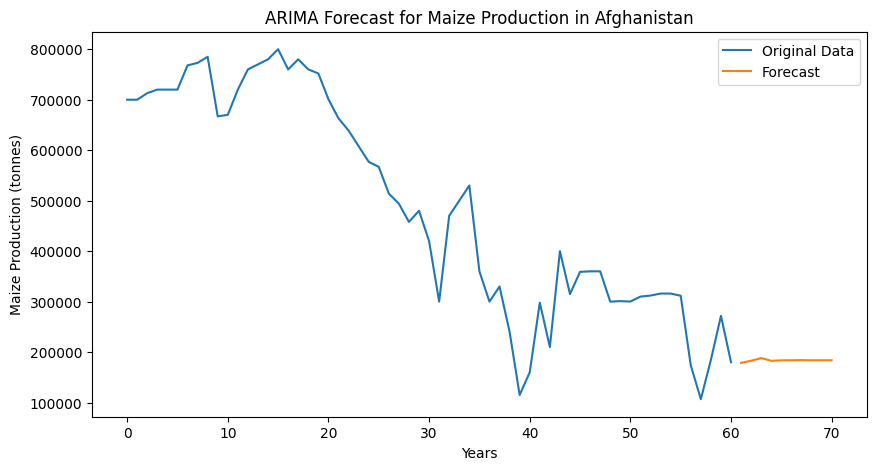

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Example: Forecasting Maize Production for Afghanistan
afghanistan_maize = df[df['Entity'] == 'Afghanistan']['Maize_Production_']

# Fit the ARIMA model
model = ARIMA(afghanistan_maize, order=(5,1,0))
model_fit = model.fit()

# Make forecast for the next 10 years
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(10,5))
plt.plot(afghanistan_maize, label='Original Data')
plt.plot(range(len(afghanistan_maize), len(afghanistan_maize) + 10), forecast, label='Forecast')
plt.xlabel('Years')
plt.ylabel('Maize Production (tonnes)')
plt.title('ARIMA Forecast for Maize Production in Afghanistan')
plt.legend()
plt.show()


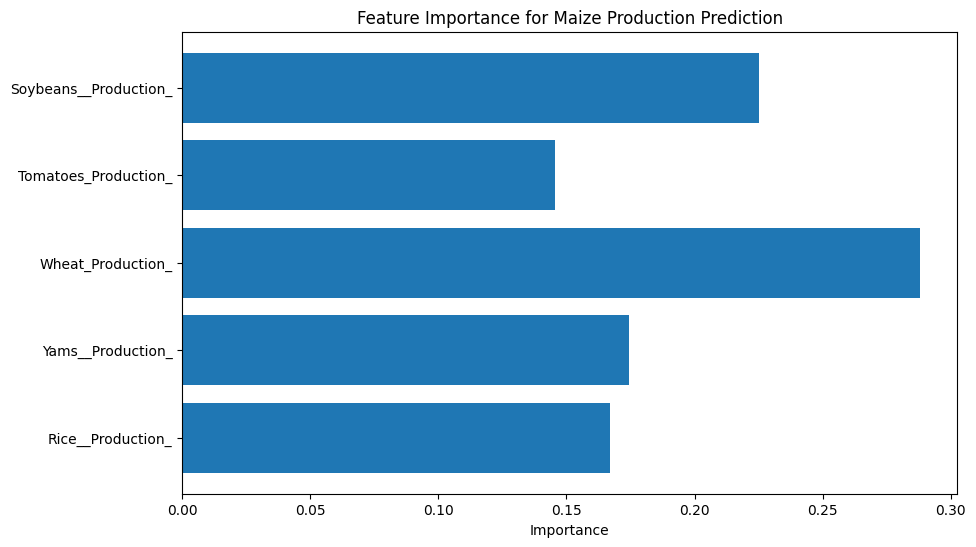

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target for prediction
features = ['Rice__Production_', 'Yams__Production_', 'Wheat_Production_',
            'Tomatoes_Production_', 'Soybeans__Production_']
target = 'Maize_Production_'

# Prepare data
X = df[features].fillna(0)
y = df[target].fillna(0)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance
importance = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.title('Feature Importance for Maize Production Prediction')
plt.show()


In [27]:
from sklearn.ensemble import IsolationForest

# Select food production columns
production_columns = ['Maize_Production_', 'Rice__Production_', 'Yams__Production_',
                      'Wheat_Production_', 'Tomatoes_Production_', 'Soybeans__Production_']

# Fill missing values and scale the data
scaled_data = scaler.fit_transform(df[production_columns].fillna(0))

# Apply Isolation Forest for anomaly detection
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = isolation_forest.fit_predict(scaled_data)

# Check anomalies
anomalies = df[df['Anomaly'] == -1]
print(anomalies[['Entity', 'Year', 'Maize_Production_', 'Anomaly']])


            Entity  Year  Maize_Production_  Anomaly
43     Afghanistan  2004       4.000000e+05       -1
44     Afghanistan  2005       3.150000e+05       -1
45     Afghanistan  2006       3.590000e+05       -1
46     Afghanistan  2007       3.600000e+05       -1
47     Afghanistan  2008       3.600000e+05       -1
...            ...   ...                ...      ...
11693        World  2017       1.139705e+09       -1
11694        World  2018       1.124172e+09       -1
11695        World  2019       1.137617e+09       -1
11696        World  2020       1.162998e+09       -1
11697        World  2021       1.210235e+09       -1

[596 rows x 4 columns]


In [28]:
from scipy.stats import f_oneway

# Example: Comparing Maize production across different countries
afghanistan_maize = df[df['Entity'] == 'Afghanistan']['Maize_Production_'].dropna()
brazil_maize = df[df['Entity'] == 'Brazil']['Maize_Production_'].dropna()
india_maize = df[df['Entity'] == 'India']['Maize_Production_'].dropna()

# Perform ANOVA
f_stat, p_value = f_oneway(afghanistan_maize, brazil_maize, india_maize)
print(f'F-statistic: {f_stat}, P-value: {p_value}')


F-statistic: 81.63720819242059, P-value: 5.845155753567916e-26
